In [4]:
!pip install pandas numpy seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip list | grep pandas
!pip list | grep numpy
!pip list | grep seaborn

pandas                        1.3.5
pandas-datareader             0.9.0
pandas-gbq                    0.13.3
pandas-profiling              1.4.1
sklearn-pandas                1.8.0
numpy                         1.21.6
seaborn                       0.11.2


In [6]:
import pandas as pd
import numpy as np
import seaborn as sb

# Visualisation d’un nuage de points et exploration des variables

1.   Importez les librairies qu’il nous faut (pandas, seaborn, matplotlib, numpy)

In [7]:
path = "/content/drive/MyDrive/Hitema/Datasets/house_pricing.csv"
house_pricing = pd.read_csv(path)

In [8]:
house_pricing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


2.   Donnez la liste des variables présentes dans ce dataset ainsi que leur nature (sont elles qualitatives, quantitatives, discrète etc…) et leur type (float, int, str etc…)

In [9]:
house_pricing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [10]:
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

3.   En créant un nuage de points, regardez comment se comporte la colonne LotArea par
rapport au SalePrice

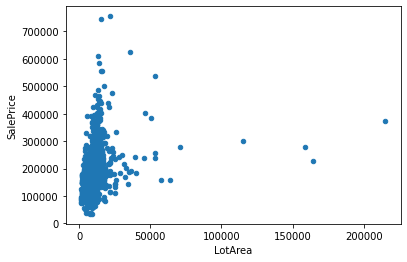

In [11]:
house_pricing.plot(x='LotArea', y='SalePrice', kind='scatter')

4.   Affinez votre visualisation en ne gardant uniquement les maisons qui ont un LotArea inférieur à 20 000 pieds carrés et un prix inférieur à 500 000$

In [12]:
#deux méthodes pour sélectionner une colonne d'un dataframe
house_pricing['LotArea'] #préférable
#house_pricing.LotArea

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [13]:
#méthode masque: house_pricing['LotArea'] < 20000
tmp = house_pricing[house_pricing['LotArea'] < 20000] #sort un dataframe filtré selon la condition: colonne du dataframe correspondant à la condition

In [14]:
tmp2 = tmp[tmp['SalePrice'] < 500000]; tmp2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


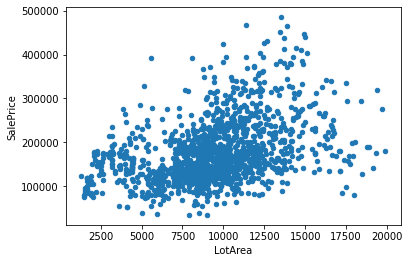

In [15]:
house_pricing.query('LotArea < 20000 & SalePrice < 500000').plot(x='LotArea', y='SalePrice', kind='scatter')

5.   En créant un nuage de points, regardez la relation entre le LotFrontage et le LotArea

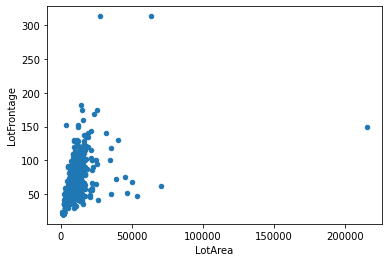

In [16]:
house_pricing.plot(x='LotArea', y='LotFrontage', kind='scatter')

6.   De la même manière, affinez votre visualisation en ne gardant uniquement les maisons qui ont un LotFrontage inférieur à 200 pieds carrés et un LotArea inférieur à 100000 pieds carré

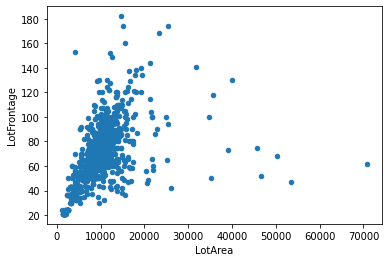

In [17]:
house_pricing.query('LotArea < 100000 & LotFrontage < 200').plot(x='LotArea', y='LotFrontage', kind='scatter')

# Visualisation de relations continues

1.   Importez les librairies qu’il vous faut



In [18]:
path = "/content/drive/MyDrive/Hitema/Datasets/sales_predictions.csv"
sales_predictions = pd.read_csv(path)

In [19]:
sales_predictions

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [20]:
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


2.   En utilisant relplot(), construisez un graphique qui va vous permettre de voir l’évolution des prix par rapport au temps. Que pouvez vous voir ?

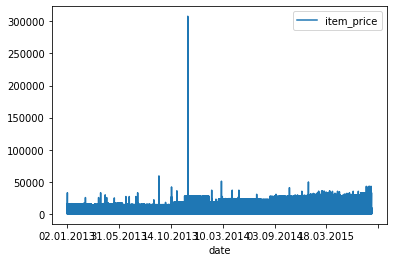

In [21]:
sales_predictions.plot(x='date', y='item_price')

3.   Corrigeons le problème de visualisation, en utilisant la fonction .sample() de Pandas, prenez un échantillons de 50 éléments dans votre dataset


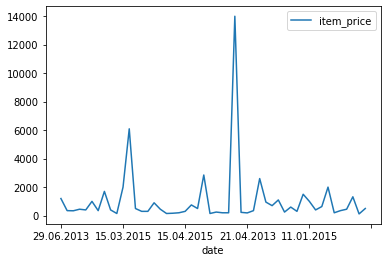

In [22]:
sales_predictions.sample(50).plot(x='date', y='item_price')

4.   Retentez de faire votre visualisation, créez une figure de taille (20,6). Que voyez vous ?

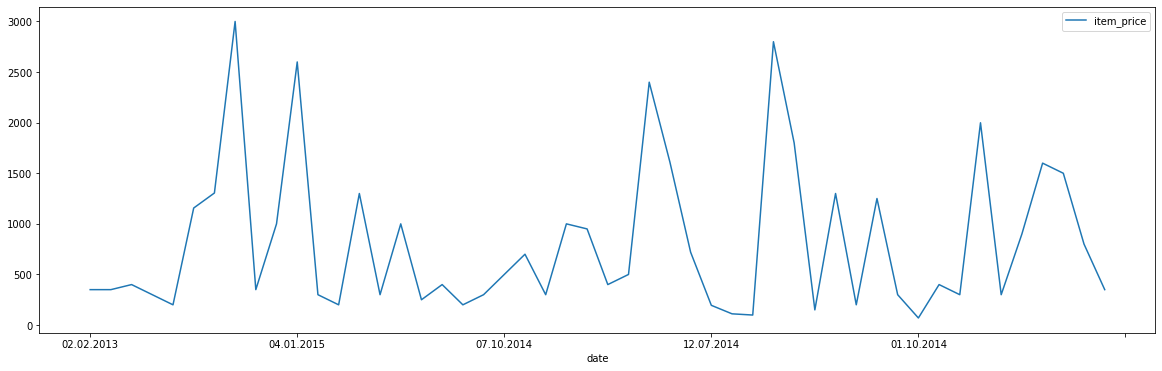

In [23]:
sales_predictions.sample(50).plot(x='date', y='item_price', figsize=(20, 6))

5.   En utilisant la fonction pd.to_datetime(), convertissez votre colonne date en datetime

In [24]:
sales_predictions['date']

0          02.01.2013
1          03.01.2013
2          05.01.2013
3          06.01.2013
4          15.01.2013
              ...    
2935844    10.10.2015
2935845    09.10.2015
2935846    14.10.2015
2935847    22.10.2015
2935848    03.10.2015
Name: date, Length: 2935849, dtype: object

In [31]:
sales_predictions['date'] = pd.to_datetime(sales_predictions['date'], dayfirst=True)
sales_predictions['date']

0         2013-01-02
1         2013-01-03
2         2013-01-05
3         2013-01-06
4         2013-01-15
             ...    
2935844   2015-10-10
2935845   2015-10-09
2935846   2015-10-14
2935847   2015-10-22
2935848   2015-10-03
Name: date, Length: 2935849, dtype: datetime64[ns]

6.   Retentez une dernière fois votre visualisation

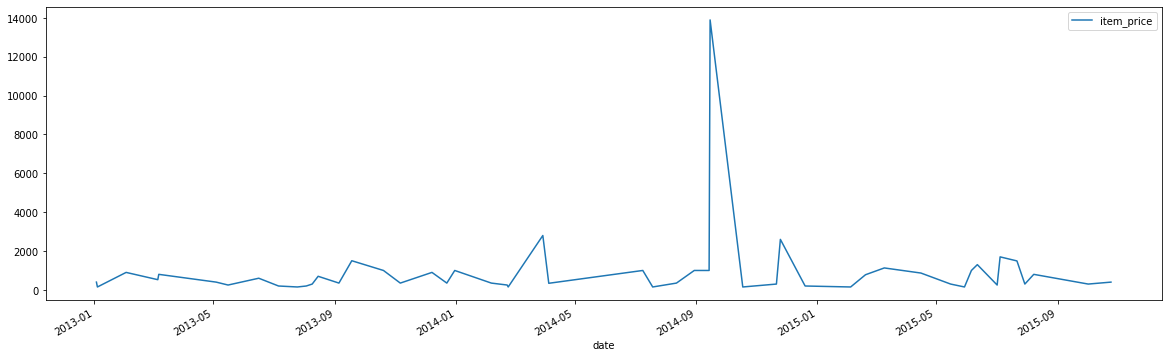

In [32]:
sales_predictions.sample(50).plot(x='date', y='item_price', figsize=(20, 6))